In [2]:
import sys
import os

sys.path.append('../')

In [5]:
from Unlearner.DPLRUnlearner import DPLRUnlearner
from Applications.FeatureUnlearning.LinearEnsembleExperiments import split_train_data, create_models
from Applications.FeatureUnlearning.DataLoader import DataLoader
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Certified Unlearning

We firstly show some examples on the linear classifier with certification guarantees. Firstly, how large is the gradient residual for different unlearning algorithms and what accuracy does a classifier achieve that has noise that corresponds to this gradient residual?

In [4]:
dataset_name = 'Enron'  # we use the spam dataset as an example
#dataset_name = 'Drebin'  # we use the spam dataset as an example
normalize = True  # we normalize the datapoints to have euclidean norm of 1
# load the training and test data
loader = DataLoader(dataset_name, normalize)
train_data, test_data, voc = (loader.x_train, loader.y_train), (loader.x_test, loader.y_test), loader.voc
category_to_idx_dict = loader.category_to_idx_dict
# create folders for results
res_save_folder = 'Results_{}'.format(dataset_name)
model_save_folder = 'Models_{}'.format(dataset_name)
if not os.path.isdir(res_save_folder):
    os.makedirs(res_save_folder)
# relevant features contain the privacy sensitive features of the dataset, (names in the case of Enron)
relevant_features = loader.relevant_features
relevant_indices = [voc[f] for f in relevant_features]
# lets see some names that were found in the dataset
print(','.join(relevant_features[:10]))
# these features will be deleted
indices_to_delete = relevant_indices

adams,afford,alan,allen,anderson,anthony,arnold,arthur,austin,barry


In [5]:
from Applications.FeatureUnlearning.LRExperiments import get_average_gradient_residual

# What is the gradient residual and which accuracy do we achieve when we set epsilon=0.1 and want to certify the unlearning?

lambda_ = 1.0  # regularization strength
sigma = 0.0  # noise to compute gradient residual
combination_lengths = [10,50,100] # we remove 10,50,100 names
n_combinations = 10 # we sample 10 combinations of [10,50,100] features to remove
unlearning_rate = 0.0001 # First Order update unlearning rate
unlearning_rate_ft = unlearning_rate # learning rate for fine-tuning
iter_steps = 10 # for comparison, we also split up the removal into 10 single steps
remove = True # we really remove the features from the dataset


Sampling 10 combinations of 10 features ...


100%|██████████| 10/10 [01:33<00:00,  9.37s/it]


Saved results in Results_Enron/grad_residual_lambda=1.0_sigma=0.0_comb_len=10_ULR=0.0001
Gradient Residuals for methods [DP, Finetuning, First-Order, Second Order]
Mean residual: [7.692458618005429, 7.626023175102982, 7.5873719133399815, 0.09534189641761312]
Std residual: [5.486651671023508, 5.577502479959329, 5.391396873693542, 0.10760575627307914]
Sigmas for certification: [243.51547383535808, 241.4123675125, 240.18880807722132, 3.0181803029987133]
Retraining from scratch achieved accuracy of 0.9844750889679716
SISA achieved accuracy of 0.9626779359430604
Retraining model with resulting sigma from DP for 100 times ...


100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


DP achieved avg accuracy of 0.6182384341637011 (min 0.49495848161328587, max 0.763196915776987).
DP achieved avg macro f1 score of 0.5631464707377781.
DP achieved weighted f1 score of 0.5630148946641625.
Retraining model with resulting sigma from Finetuning for 100 times ...


100%|██████████| 100/100 [00:22<00:00,  4.42it/s]


Finetuning achieved avg accuracy of 0.6217645314353499 (min 0.49347568208778175, max 0.7726868327402135).
Finetuning achieved avg macro f1 score of 0.5689415974992101.
Finetuning achieved weighted f1 score of 0.5674731624356164.
Retraining model with resulting sigma from 1st-Order for 100 times ...


100%|██████████| 100/100 [00:22<00:00,  4.42it/s]


1st-Order achieved avg accuracy of 0.6352787663107948 (min 0.5007413997627521, max 0.7872182680901542).
1st-Order achieved avg macro f1 score of 0.5909116304422016.
1st-Order achieved weighted f1 score of 0.5904271454631997.
Retraining model with resulting sigma from 2nd-Order for 100 times ...


100%|██████████| 100/100 [01:12<00:00,  1.38it/s]


2nd-Order achieved avg accuracy of 0.9556227758007115 (min 0.9491399762752076, max 0.9612989323843416).
2nd-Order achieved avg macro f1 score of 0.9555485788505372.
2nd-Order achieved weighted f1 score of 0.955612017466255.


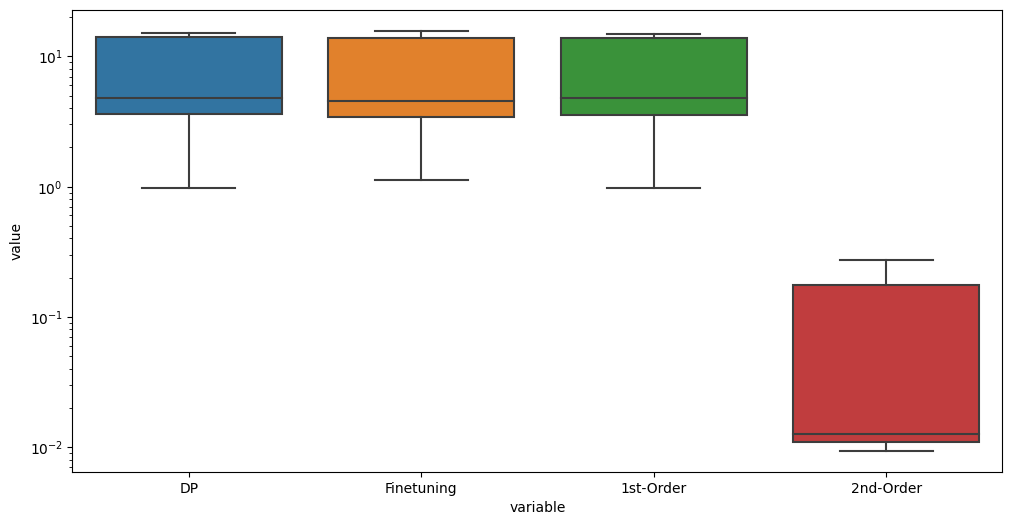


Sampling 10 combinations of 50 features ...


100%|██████████| 10/10 [01:28<00:00,  8.85s/it]


Saved results in Results_Enron/grad_residual_lambda=1.0_sigma=0.0_comb_len=50_ULR=0.0001
Gradient Residuals for methods [DP, Finetuning, First-Order, Second Order]
Mean residual: [14.256729497858359, 14.056066196672282, 14.044354174716034, 0.3144786057885517]
Std residual: [10.18693749691004, 10.095489533802045, 10.010191497112778, 0.3997895989967713]
Sigmas for certification: [451.31659608637426, 444.9643202671298, 444.593559926662, 9.955257545413799]
Retraining from scratch achieved accuracy of 0.9839857651245552
SISA achieved accuracy of 0.9481613285883748
Retraining model with resulting sigma from DP for 100 times ...


100%|██████████| 100/100 [00:23<00:00,  4.34it/s]


DP achieved avg accuracy of 0.5923161328588376 (min 0.4989620403321471, max 0.6938018979833926).
DP achieved avg macro f1 score of 0.558455693781497.
DP achieved weighted f1 score of 0.5585185008903455.
Retraining model with resulting sigma from Finetuning for 100 times ...


100%|██████████| 100/100 [00:27<00:00,  3.65it/s]


Finetuning achieved avg accuracy of 0.5924199288256227 (min 0.4918446026097272, max 0.7101126927639383).
Finetuning achieved avg macro f1 score of 0.5566376842721672.
Finetuning achieved weighted f1 score of 0.555749953499815.
Retraining model with resulting sigma from 1st-Order for 100 times ...


100%|██████████| 100/100 [00:21<00:00,  4.63it/s]


1st-Order achieved avg accuracy of 0.5973413404507711 (min 0.4893238434163701, max 0.7279062870699882).
1st-Order achieved avg macro f1 score of 0.5675702350785499.
1st-Order achieved weighted f1 score of 0.5672343202404383.
Retraining model with resulting sigma from 2nd-Order for 100 times ...


100%|██████████| 100/100 [01:05<00:00,  1.52it/s]


2nd-Order achieved avg accuracy of 0.8972049228944247 (min 0.8879003558718861, max 0.9086595492289442).
2nd-Order achieved avg macro f1 score of 0.897096012076529.
2nd-Order achieved weighted f1 score of 0.8972123541708448.


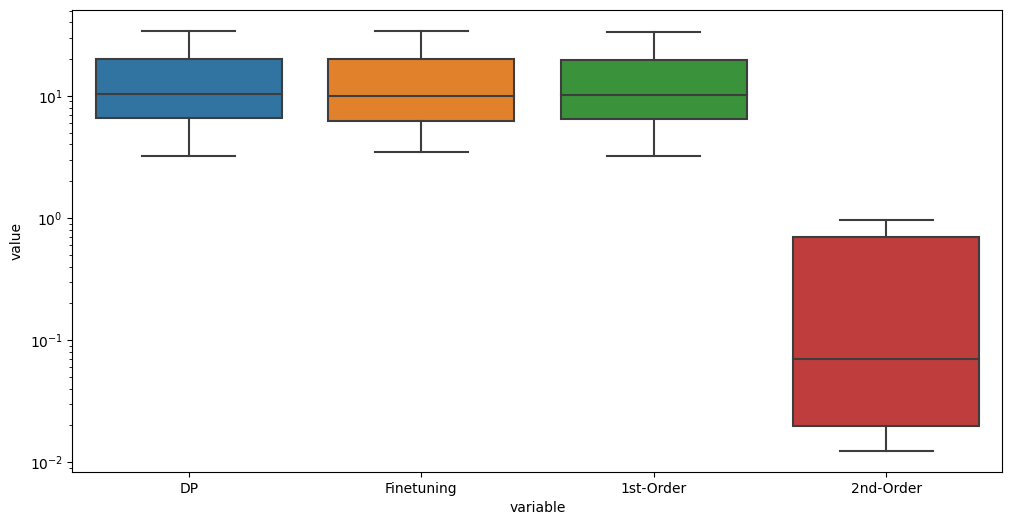


Sampling 10 combinations of 100 features ...


100%|██████████| 10/10 [02:06<00:00, 12.68s/it]


Saved results in Results_Enron/grad_residual_lambda=1.0_sigma=0.0_comb_len=100_ULR=0.0001
Gradient Residuals for methods [DP, Finetuning, First-Order, Second Order]
Mean residual: [26.507356717087475, 26.177722231337697, 26.084611768916012, 0.8662531371601474]
Std residual: [13.040083247282926, 13.007218656460292, 12.78966524815024, 0.6093142658415435]
Sigmas for certification: [839.1272350787267, 828.6921970790494, 825.7446559219773, 27.422447572635072]
Retraining from scratch achieved accuracy of 0.9831257413997626
SISA achieved accuracy of 0.916429418742586
Retraining model with resulting sigma from DP for 100 times ...


100%|██████████| 100/100 [00:25<00:00,  3.96it/s]


DP achieved avg accuracy of 0.5600252075919335 (min 0.4676749703440095, max 0.6497627520759194).
DP achieved avg macro f1 score of 0.5402620083301898.
DP achieved weighted f1 score of 0.540492872952873.
Retraining model with resulting sigma from Finetuning for 100 times ...


100%|██████████| 100/100 [00:25<00:00,  3.86it/s]


Finetuning achieved avg accuracy of 0.5604374258600238 (min 0.4473606168446026, max 0.6625148279952551).
Finetuning achieved avg macro f1 score of 0.5375637312085904.
Finetuning achieved weighted f1 score of 0.5371693658568164.
Retraining model with resulting sigma from 1st-Order for 100 times ...


100%|██████████| 100/100 [00:25<00:00,  3.97it/s]


1st-Order achieved avg accuracy of 0.56089709371293 (min 0.48413404507710556, max 0.6706702253855279).
1st-Order achieved avg macro f1 score of 0.5421618878974038.
1st-Order achieved weighted f1 score of 0.5419670078841289.
Retraining model with resulting sigma from 2nd-Order for 100 times ...


100%|██████████| 100/100 [00:57<00:00,  1.74it/s]

2nd-Order achieved avg accuracy of 0.8364753855278767 (min 0.8190984578884934, max 0.8576512455516014).
2nd-Order achieved avg macro f1 score of 0.8363490611689243.
2nd-Order achieved weighted f1 score of 0.8365046098510773.


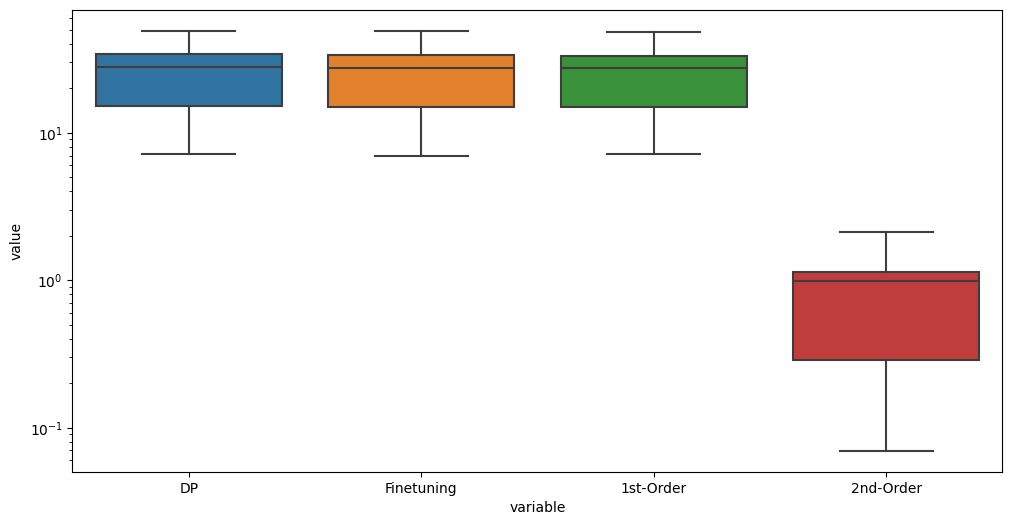

In [6]:
get_average_gradient_residual(train_data, test_data, voc, lambda_, sigma, indices_to_delete,
                            combination_lengths, n_combinations, unlearning_rate, unlearning_rate_ft,
                            iter_steps, category_to_idx_dict, remove=remove, save_path=res_save_folder)

### Results

We see that the gradient residual of the second order is by far the smallest and the gradient residual is always increasing when we increase the number of features to be deleted. In terms of accuracy, the second order update remains close to retraining when the number of features removed is not too high.

### Fidelity Evaluation

How do the unlearning strategies impact the classifier? We give an example of a scatter plot used in the paper to measure the difference between unlearning and retraining (here sigma=0) using the difference in test loss to get a better understanding of the fidelity each method yields.

url::http://schemas.android.com/apk/res/,url::r.admob.com,url::http://r.admob.com/ad_source.php,url::http://mm.admob.com/static/android/canvas.html,url::http://mm.admob.com/static/android/i18n/20100820,url::http://api.admob.com/v1/pubcode/android_sdk_emulator_notice,url::http://a.admob.com/f0?,url::mm.admob.com,url::api.admob.com,url::a.admob.com


100%|██████████| 30/30 [01:18<00:00,  2.62s/it]

Saved results at ./scatter_losses-combinations-20-lambda-1.0-sigma-0.0-top-140.npy


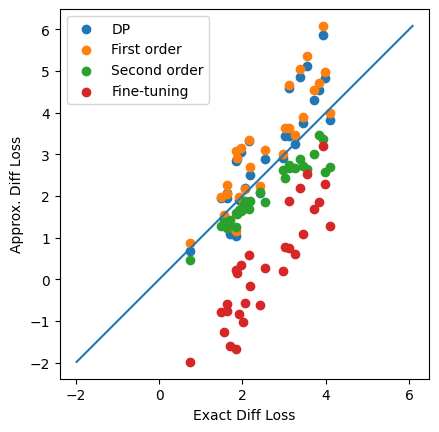

In [12]:
from Applications.FeatureUnlearning.LRExperiments import scatter_experiments
from Applications.FeatureUnlearning.LRExperiments import find_most_relevant_indices

dataset_name = 'Drebin'  # we use the malware dataset as an example
normalize = True  # we normalize the datapoints to have euclidean norm of 1
# load the training and test data
loader = DataLoader(dataset_name, normalize)
train_data, test_data, voc = (loader.x_train, loader.y_train), (loader.x_test, loader.y_test), loader.voc
category_to_idx_dict = loader.category_to_idx_dict
# create folders for results
res_save_folder = 'Results_{}'.format(dataset_name)
model_save_folder = 'Models_{}'.format(dataset_name)
if not os.path.isdir(res_save_folder):
    os.makedirs(res_save_folder)
# relevant features contain the privacy sensitive features of the dataset, (names in the case of Enron)
relevant_features = loader.relevant_features
relevant_indices = [voc[f] for f in relevant_features]
# lets see some names that were found in the dataset
print(','.join(relevant_features[:10]))
#
combination_length = 20
most_important_size = 300
n_combinations = 30
unlearning_rate = 0.001 # First Order update unlearning rate
unlearning_rate_ft = 0.0001 # learning rate for fine-tuning
# here, we mix in important features such that the effect is stronger
top_indices, _ = find_most_relevant_indices(train_data, test_data, voc, top_n=most_important_size)
indices_to_delete = np.intersect1d(top_indices, relevant_indices)

scatter_experiments(train_data, test_data, voc, lambda_, sigma, indices_to_delete, combination_length,
                   unlearning_rate, unlearning_rate_ft, n_combinations, category_to_idx_dict,
                   remove)

### Results

The identiy line is optimal in this plot, i.e. the second order update gives again the best results. Although the difference seems small, recall that the loss is a very sensitive metric to measure differences.

In [11]:
import numpy as np

trainable_weights = [i  for i in range(0, 17)]
trainable_weights[0:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
trainable_weights[-10:]

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [ ]:

path_clean_fo = poisoned_folder/'first-order' /'RESNET50_Cifar10_classifier_clean_fo_repaired_model.hdf5'
# clean_fo_so_clean
# print(f"**** clean_fo_so_clean ****") 
train_results = path_clean_fo
so_experiment(poisoned_folder/'second-order', train_kwargs, poison_kwargs, so_unlearn_kwargs,target_args='RESNET50_Cifar10_feature_extraction-clean_fo_so_clean-10', modelweights=path_clean_fo, train_results=train_results)
evaluate(model,data=Cifar10.load(), weights_path=poisoned_folder/'second-order'/'RESNET50_Cifar10_feature_extraction_clean_fo_so_clean_repaired_model.hdf5')

# clean_fo_clean_so
# print(f"**** clean_fo_clean_so ****") 
train_results = path_clean_fo
so_experiment(poisoned_folder/'second-order', train_kwargs, poison_kwargs, so_unlearn_kwargs,target_args='RESNET50_Cifar10_classifier-clean_fo_clean_so-6', modelweights=path_clean_fo, train_results=train_results)
evaluate(model,data=Cifar10.load(), weights_path=poisoned_folder/'second-order'/'RESNET50_Cifar10_classifier_clean_fo_clean_so_repaired_model.hdf5')

# clean_fo_fo_clean
# print(f"**** clean_fo_fo_clean ****") 
train_results=path_clean_fo
fo_experiment(poisoned_folder/'first-order', train_kwargs, poison_kwargs, so_unlearn_kwargs,target_args='RESNET50_Cifar10_feature_extraction-clean_fo_fo_clean-10', modelweights=path_clean_fo, train_results=train_results)
evaluate(model,data=Cifar10.load(), weights_path=poisoned_folder/'first-order'/'RESNET50_Cifar10_feature_extraction_clean_fo_fo_clean_repaired_model.hdf5')

# clean_fo_clean_fo
# print(f"**** clean_fo_clean_fo ****") 
train_results=path_clean_fo
fo_experiment(poisoned_folder/'first-order', train_kwargs, poison_kwargs, fo_unlearn_kwargs,target_args='RESNET50_Cifar10_classifier-clean_fo_clean_fo-6', modelweights=path_clean_fo, train_results=train_results)
evaluate(model,data=Cifar10.load(), weights_path=poisoned_folder/'first-order'/'RESNET50_Cifar10_classifier_clean_fo_clean_fo_repaired_model.hdf5')

# clean_fo_fo_fo
# print(f"**** clean_fo_fo_fo ****") 
train_results=path_clean_fo
fo_experiment(poisoned_folder/'first-order', train_kwargs, poison_kwargs, fo_unlearn_kwargs,target_args='RESNET50_Cifar10_both-clean_fo_fo_fo-16', modelweights=path_clean_fo, train_results=train_results)
evaluate(model,data=Cifar10.load(), weights_path=poisoned_folder/'first-order'/'RESNET50_Cifar10_both_clean_fo_fo_fo_repaired_model.hdf5')

# clean_fo_so_so
print(f"**** clean_fo_so_so ****")
train_results=path_clean_fo
so_experiment(poisoned_folder/'second-order', train_kwargs, poison_kwargs, so_unlearn_kwargs,target_args='RESNET50_Cifar10_both-clean_fo_so_so-16', modelweights=path_clean_fo, train_results=train_results)
evaluate(model,data=Cifar10.load(), weights_path=poisoned_folder/'second-order'/'RESNET50_Cifar10_both_clean_fo_so_so_repaired_model.hdf5')

# clean_fo_so_fo
# print(f"**** clean_fo_so_fo ****") 
# take so_clean like path
train_results=path_clean_fo
path_clean_fo_so_clean = poisoned_folder/'second-order'/'RESNET50_Cifar10_feature_extraction_clean_fo_so_clean_repaired_model.hdf5'
fo_experiment(poisoned_folder/'first-order', train_kwargs, poison_kwargs, fo_unlearn_kwargs,target_args='RESNET50_Cifar10_classifier-clean_fo_so_fo-6', modelweights=path_clean_fo_so_clean, train_results=train_results)
evaluate(model,data=Cifar10.load(), weights_path=poisoned_folder/'first-order'/'RESNET50_Cifar10_classifier-clean_fo_so_fo_repaired_model.hdf5')

# clean_fo_fo_so
# print(f"**** clean_fo_fo_so ****") 
# take clean_fo_fo_clean like path
train_results=path_clean_fo
path_clean_fo_fo_clean = poisoned_folder/'second-order'/'RESNET50_Cifar10_feature_extraction_clean_fo_fo_clean_repaired_model.hdf5'
so_experiment(poisoned_folder/'second-order', train_kwargs, poison_kwargs, so_unlearn_kwargs,target_args='RESNET50_Cifar10_classifier-clean_fo_fo_so-6', modelweights=path_clean_fo_fo_clean, train_results=train_results)
evaluate(model,data=Cifar10.load(), weights_path=poisoned_folder/'second-order'/'RESNET50_Cifar10_classifier-clean_fo_fo_so_repaired_model.hdf5')
